# Malware Detection

## Dataset malware/beningn permissions Android

The data were obtained by a process that consisted to create a binary vector of permissions used for each application analyzed {1=used, 0=no used}. 
Moreover, the samples of malware/benign were devided by "Type"; 1 malware and 0 non-malware.

More details on the dataset [here](https://www.kaggle.com/datasets/xwolf12/datasetandroidpermissions).

In [11]:
import numpy as np
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [15, 7]

In [12]:
df = pl.read_csv('../../../datasets/android_malware_permissions.csv', separator=';')
df.describe()

describe,android,android.app.cts.permission.TEST_GRANTED,android.intent.category.MASTER_CLEAR.permission.C2D_MESSAGE,android.os.cts.permission.TEST_GRANTED,android.permission.ACCESS_ALL_DOWNLOADS,android.permission.ACCESS_ALL_EXTERNAL_STORAGE,android.permission.ACCESS_BLUETOOTH_SHARE,android.permission.ACCESS_CACHE_FILESYSTEM,android.permission.ACCESS_CHECKIN_PROPERTIES,android.permission.ACCESS_COARSE_LOCATION,android.permission.ACCESS_CONTENT_PROVIDERS_EXTERNALLY,android.permission.ACCESS_DOWNLOAD_MANAGER,android.permission.ACCESS_DOWNLOAD_MANAGER_ADVANCED,android.permission.ACCESS_DRM_CERTIFICATES,android.permission.ACCESS_FINE_LOCATION,android.permission.ACCESS_FM_RADIO,android.permission.ACCESS_INPUT_FLINGER,android.permission.ACCESS_KEYGUARD_SECURE_STORAGE,android.permission.ACCESS_LOCATION_EXTRA_COMMANDS,android.permission.ACCESS_MOCK_LOCATION,android.permission.ACCESS_MTP,android.permission.ACCESS_NETWORK_CONDITIONS,android.permission.ACCESS_NETWORK_STATE,android.permission.ACCESS_NOTIFICATIONS,android.permission.ACCESS_PDB_STATE,android.permission.ACCESS_SURFACE_FLINGER,android.permission.ACCESS_WIFI_STATE,android.permission.ACCESS_WIMAX_STATE,android.permission.ACCOUNT_MANAGER,android.permission.ALLOW_ANY_CODEC_FOR_PLAYBACK,android.permission.ASEC_ACCESS,android.permission.ASEC_CREATE,android.permission.ASEC_DESTROY,android.permission.ASEC_MOUNT_UNMOUNT,android.permission.ASEC_RENAME,android.permission.AUTHENTICATE_ACCOUNTS,…,com.android.frameworks.coretests.DANGEROUS,com.android.frameworks.coretests.NORMAL,com.android.frameworks.coretests.SIGNATURE,com.android.frameworks.coretests.keysets_permdef.keyset_perm,com.android.frameworks.coretests.permission.TEST_DENIED,com.android.frameworks.coretests.permission.TEST_GRANTED,com.android.gallery3d.filtershow.permission.READ,com.android.gallery3d.filtershow.permission.WRITE,com.android.gallery3d.permission.GALLERY_PROVIDER,com.android.launcher.permission.INSTALL_SHORTCUT,com.android.launcher.permission.PRELOAD_WORKSPACE,com.android.launcher.permission.READ_SETTINGS,com.android.launcher.permission.UNINSTALL_SHORTCUT,com.android.launcher.permission.WRITE_SETTINGS,com.android.launcher3.permission.READ_SETTINGS,com.android.launcher3.permission.RECEIVE_FIRST_LOAD_BROADCAST,com.android.launcher3.permission.RECEIVE_LAUNCH_BROADCASTS,com.android.launcher3.permission.WRITE_SETTINGS,com.android.permission.WHITELIST_BLUETOOTH_DEVICE,com.android.printspooler.permission.ACCESS_ALL_PRINT_JOBS,com.android.providers.tv.permission.ACCESS_ALL_EPG_DATA,com.android.providers.tv.permission.ACCESS_WATCHED_PROGRAMS,com.android.providers.tv.permission.READ_EPG_DATA,com.android.providers.tv.permission.WRITE_EPG_DATA,com.android.smspush.WAPPUSH_MANAGER_BIND,com.android.voicemail.permission.ADD_VOICEMAIL,com.android.voicemail.permission.READ_VOICEMAIL,com.android.voicemail.permission.WRITE_VOICEMAIL,com.foo.mypermission,com.foo.mypermission2,org.chromium.chrome.shell.permission.C2D_MESSAGE,org.chromium.chrome.shell.permission.DEBUG,org.chromium.chrome.shell.permission.SANDBOX,org.chromium.chromecast.shell.permission.SANDBOX,org.chromium.content_shell.permission.SANDBOX,test_permission,type
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,…,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

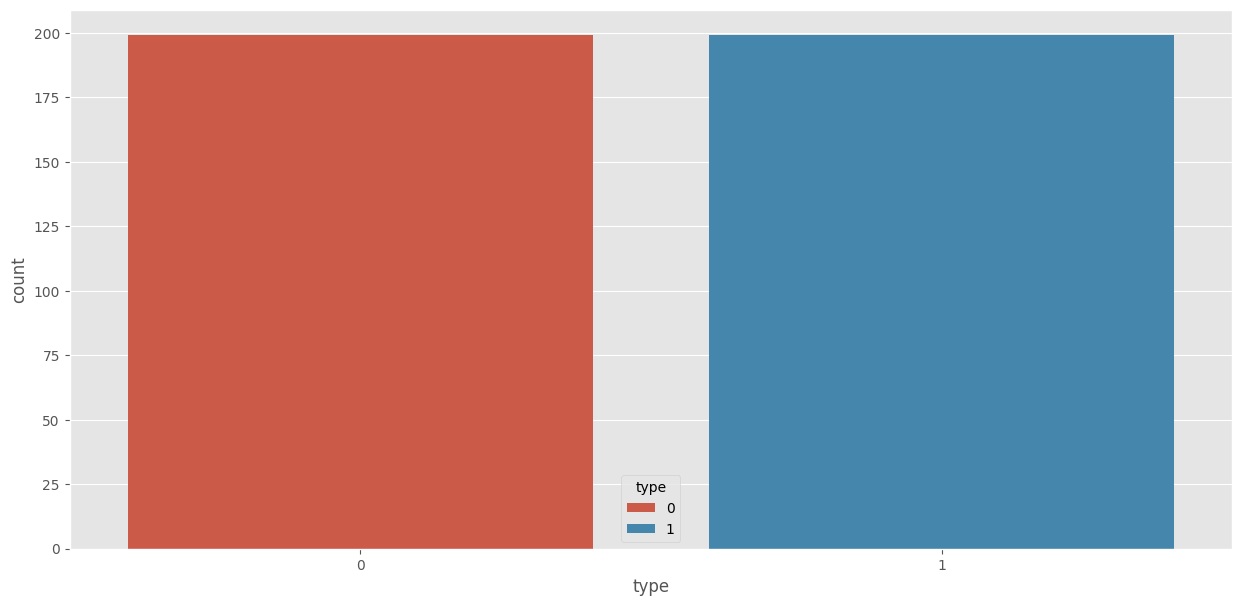

In [13]:
sns.countplot(data=df, x='type', hue='type')
plt.show()

## Pre process the dataset

In [15]:
threshold = 0.0
df = df.drop([col.name for col in df.select(pl.all().std() <= threshold) if col.item()])
#df.describe()

describe,android.permission.ACCESS_CACHE_FILESYSTEM,android.permission.ACCESS_COARSE_LOCATION,android.permission.ACCESS_DOWNLOAD_MANAGER,android.permission.ACCESS_DOWNLOAD_MANAGER_ADVANCED,android.permission.ACCESS_FINE_LOCATION,android.permission.ACCESS_LOCATION_EXTRA_COMMANDS,android.permission.ACCESS_MOCK_LOCATION,android.permission.ACCESS_NETWORK_STATE,android.permission.ACCESS_WIFI_STATE,android.permission.ACCESS_WIMAX_STATE,android.permission.AUTHENTICATE_ACCOUNTS,android.permission.BATTERY_STATS,android.permission.BLUETOOTH,android.permission.BLUETOOTH_ADMIN,android.permission.BROADCAST_PACKAGE_REMOVED,android.permission.BROADCAST_STICKY,android.permission.CALL_PHONE,android.permission.CALL_PRIVILEGED,android.permission.CAMERA,android.permission.CHANGE_COMPONENT_ENABLED_STATE,android.permission.CHANGE_CONFIGURATION,android.permission.CHANGE_NETWORK_STATE,android.permission.CHANGE_WIFI_MULTICAST_STATE,android.permission.CHANGE_WIFI_STATE,android.permission.CHANGE_WIMAX_STATE,android.permission.CLEAR_APP_CACHE,android.permission.DELETE_CACHE_FILES,android.permission.DELETE_PACKAGES,android.permission.DEVICE_POWER,android.permission.DISABLE_KEYGUARD,android.permission.DUMP,android.permission.EXPAND_STATUS_BAR,android.permission.FLASHLIGHT,android.permission.GET_ACCOUNTS,android.permission.GET_PACKAGE_SIZE,android.permission.GET_TASKS,…,android.permission.READ_SYNC_SETTINGS,android.permission.READ_SYNC_STATS,android.permission.REBOOT,android.permission.RECEIVE_BOOT_COMPLETED,android.permission.RECEIVE_MMS,android.permission.RECEIVE_SMS,android.permission.RECEIVE_WAP_PUSH,android.permission.RECORD_AUDIO,android.permission.RESTART_PACKAGES,android.permission.SEND_DOWNLOAD_COMPLETED_INTENTS,android.permission.SEND_SMS,android.permission.SET_ORIENTATION,android.permission.SET_PREFERRED_APPLICATIONS,android.permission.SET_WALLPAPER,android.permission.SET_WALLPAPER_HINTS,android.permission.SYSTEM_ALERT_WINDOW,android.permission.UPDATE_DEVICE_STATS,android.permission.USE_CREDENTIALS,android.permission.VIBRATE,android.permission.WAKE_LOCK,android.permission.WRITE_APN_SETTINGS,android.permission.WRITE_CALENDAR,android.permission.WRITE_CALL_LOG,android.permission.WRITE_CONTACTS,android.permission.WRITE_EXTERNAL_STORAGE,android.permission.WRITE_SECURE_SETTINGS,android.permission.WRITE_SETTINGS,android.permission.WRITE_SMS,android.permission.WRITE_SYNC_SETTINGS,com.android.alarm.permission.SET_ALARM,com.android.browser.permission.READ_HISTORY_BOOKMARKS,com.android.browser.permission.WRITE_HISTORY_BOOKMARKS,com.android.launcher.permission.INSTALL_SHORTCUT,com.android.launcher.permission.READ_SETTINGS,com.android.launcher.permission.UNINSTALL_SHORTCUT,com.android.launcher.permission.WRITE_SETTINGS,type
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,…,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",0.005025,0.233668,0.002513,0.002513,0.231156,0.082915,0.007538,0.575377,0.41206,0.005025,0.017588,0.002513,0.030151,0.017588,0.002513,0.005025,0.155779,0.002513,0.042714,0.002513,0.015075

## Train one or more models

In [16]:
Y = df['type']
X = df.drop(['type'])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [17]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = [LogisticRegression(max_iter=1000), DecisionTreeClassifier(), RandomForestClassifier()]

for m in models:
    # fit the model
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)
    print(classification_report(y_test, y_pred, target_names=['Benign', 'Malware']))

              precision    recall  f1-score   support

      Benign       0.87      0.97      0.92        34
     Malware       0.98      0.89      0.93        46

    accuracy                           0.93        80
   macro avg       0.92      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80

              precision    recall  f1-score   support

      Benign       0.92      0.97      0.94        34
     Malware       0.98      0.93      0.96        46

    accuracy                           0.95        80
   macro avg       0.95      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80

              precision    recall  f1-score   support

      Benign       0.84      0.94      0.89        34
     Malware       0.95      0.87      0.91        46

    accuracy                           0.90        80
   macro avg       0.90      0.91      0.90        80
weighted avg       0.91      0.90      0.90        80



## Select the best model (McNemar Test)

## Plot the confusion matrix

## Plot the feature importance